
PROJECT DESCRIPTION

BANKS ARE RECIEVING LOT OF APPLICATIONS FOR CREDIT CARDS ON DAILY BASIS,BUT MOST OF THEM GOT REJECTED FOR MANY REASONS LIKE LOW INCOME LEVELS OF AN INDIVIDUAL,HIGH LOAN BALANCES,BAD CREDIT SCORES,OCCUPATION.MANUALLY ANALYZING THESE APPLICATIONS IS ERROR PRONE AND TIME CONSUMING.FORTUNATELY, THIS ENTIRE PROCESS CAN BE AUTOMATED WITH POWER OF MACHINE LEARNING,SO WE WILL BUILD AN AUTOMATIC CREDIT CARD APPROVAL PREDICTOR USING MACHINE LEARNING TECHNIQUE

IMPORTING ALL THE ESSENTIAL LIBRARIES THAT WE WANT TO DO EXPLORATORY DATA ANALYSIS

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [220]:
data_file_1 = pd.read_csv("/content/Credit_card.csv")

In [221]:
data_file_2 = pd.read_csv("/content/Credit_card_label.csv")

BASIC EXPLORATION OF THE DATA

In [222]:
data_file_1.head(4)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [223]:
data_file_2.head(4)

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1


In [224]:
data_file_1.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2


In [225]:
data_file_2.tail()

,Ind_ID,label
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0
1547,5053790,0


Here we need to merge both the data files into single dataframe by using the common column(IND_ID)

In [226]:
data = pd.merge(data_file_1,data_file_2,on = "Ind_ID")

In [227]:
data.head(5)  # To just check wheather label column has been added or not

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [228]:
data.shape

(1548, 19)

In [229]:
# we are having 19 columns and 1548 records in the data after combining both the files

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [231]:
data.describe()  # to know summary statistics of columns with numeric data

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


<Axes: >

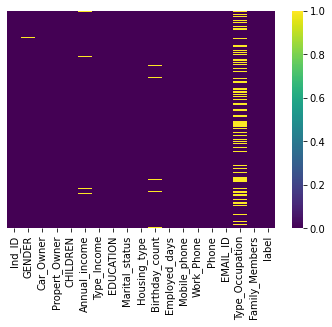

In [232]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis') # for plotting null values in each column we are using the heatmap

TO KNOW WHAT ARE THE UNIQUE VALUES THAT WE ARE HAVING IN THEIR RESPECTIVE COLUMNS

In [233]:
for i in data.columns:
    #print(i)
    if data[i].dtype==object:
        print(data[i].unique())       # CATEGORICAL DATA

['M' 'F' nan]
['Y' 'N']
['Y' 'N']
['Pensioner' 'Commercial associate' 'Working' 'State servant']
['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']
['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Co-op apartment' 'Office apartment']
[nan 'Core staff' 'Cooking staff' 'Laborers' 'Sales staff' 'Accountants'
 'High skill tech staff' 'Managers' 'Cleaning staff' 'Drivers'
 'Low-skill Laborers' 'IT staff' 'Waiters/barmen staff' 'Security staff'
 'Medicine staff' 'Private service staff' 'HR staff' 'Secretaries'
 'Realty agents']


In [234]:
for i in data.columns:
  if data[i].dtype==int:
    print(data[i].unique())       # INTEGER DATA

[5008827 5009744 5009746 ... 5115992 5118219 5053790]
[ 0  1  2  4  3 14]
[365243   -586   -678  -1002   -913   -248  -2470  -1644  -4327  -1674
  -1086   -925   -854   -185  -3350   -691  -4770  -2394   -384  -3647
  -1546   -808  -1285   -855  -7369  -2269  -4114  -1161  -7288   -166
   -866   -564  -3366  -2150  -1458  -8369   -508  -1567   -137  -3974
  -1570  -2878   -140  -2576  -1905  -1724  -1328  -4987  -3496  -1394
  -1265  -2531  -2105   -860   -217   -535  -6866   -584  -2227  -8161
   -613   -606  -6944   -346  -1808  -3420   -863  -7413  -7553  -3931
  -1039   -134   -622  -1595  -1626  -1868   -555  -1935   -931   -900
  -4305   -499  -2418   -189  -1132  -1770   -919  -1081   -502  -2420
  -1325  -6367  -2484   -341  -9422  -3054  -2987  -2128   -820   -141
  -1692  -4686   -693   -567   -885  -2769  -1547  -3179  -5204  -3072
   -320  -2469   -583   -834  -1085  -1399  -7310  -1748  -2479   -875
  -2805  -2477  -1477  -1782   -431  -1416   -263  -2349   -412  -7068
  -

In [235]:
for i in data.columns:
  if data[i].dtype==float:
    print(data[i].unique())       # FLOAT DATA

[ 180000.   315000.        nan  450000.    90000.   472500.   270000.
  126000.   202500.   157500.   112500.   540000.   292500.   135000.
   76500.   215100.   225000.    67500.   171000.   103500.    99000.
  391500.    65250.    72900.   360000.   256500.   675000.   247500.
   85500.   121500.   130500.   211500.    81000.    72000.   148500.
  162000.   195750.   585000.   216000.   306000.   108000.    63000.
   45000.   337500.   131400.   117000.   445500.   234000.  1575000.
  144000.    67050.    73350.   193500.   900000.    94500.   198000.
   54000.   166500.   167400.   153000.   423000.   243000.   283500.
  252000.   495000.   612000.    36000.   139500.   133650.   427500.
  261000.   231750.    90900.    45900.   119250.    58500.   328500.
  787500.   594000.   119700.    69372.    37800.   387000.   207000.
  189000.   333000.   105750.   382500.   141750.    40500.   405000.
   44550.   301500.   351000.   175500.   121900.5  238500.    33750.
  116100.   297000. 

In [236]:
data.duplicated().sum()

0

INITIAL INSIGHTS OF THE DATA AFTER BASIC EXPLORATION ARE LISTED BELOW

1)THERE ARE MANY NULL VALUES PRESENT IN THE DATA ESPECIALLY IN GENDER,ANNUAL INCOME,BIRTHDAY_COUNT,TYPE_OCCUPATION COLUMNS BUT WE ARE HAVING ONLY LIMITED ROWS SO WE NEED TO HANDLE MISSING VALUES INSTEAD OF REMOVING THEM.

2)THERE ARE OUTLIERS PRESENT IN CHILDREN,FAMILY_MEMBERS AND BIRTHDAY_COUNT COLUMS SO WE NEED TO HANDLE THEM.

3)THE DATA IS HAVING DIFFERENT TYPES OF DATATYPES SICH AS OBJECT AND FLOAT,SO WE NEED TO DO TYPE CASTING AND ENCODING SO THAT WE CAN USE IT FOR OUR ML MODEL.

4)WE NEED TO CONVERT THE BIRTHDAY_COUNT AND EMPLOYED DAYS INTO PROPER FORMAT.

5) THERE ARE NO DUPLICATE RECORDS PRESENT

DATA CLEANING AND FEATURE ENGINEERING

In [237]:
data.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [238]:
data['GENDER'].value_counts()

F    973
M    568
Name: GENDER, dtype: int64

In [239]:
# here female is listed significantly more than male and count of nulls in gender are only seven so we will replace them with F

In [240]:
data['GENDER'].fillna('F',inplace = True)

In [241]:
data['Annual_income'].mean()

191399.3262295082

In [242]:
data['Annual_income'].median()

166500.0

In [243]:
data['Annual_income'].mode()

0    135000.0
Name: Annual_income, dtype: float64

In [244]:
# As mean is sensitive to outliers I will replace the null values with median

In [245]:
data['Annual_income'].replace([np.nan,166500],inplace = True)

In [246]:
data['GENDER'].replace('M',0,inplace=True) 
data['GENDER'].replace('F',1,inplace=True)
data['Car_Owner'].replace('Y',0,inplace=True)
data['Car_Owner'].replace('N',1,inplace=True)
data['Propert_Owner'].replace('Y',0,inplace=True)
data['Propert_Owner'].replace('N',1,inplace=True)
data.head(4)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,0,0,0,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,1,0,1,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,1,0,1,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,1,0,1,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [247]:
data['Age']=-(data['Birthday_count'])//365

data['employee_from_years']=-(data['Employed_days'])//365

data.drop(columns=('Birthday_count'), inplace=True)

data.drop(columns=('Employed_days'), inplace=True)         # feature selection also doing simultaneously
data.head(4)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,employee_from_years
0,5008827,0,0,0,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,NaN,2,1,51.0,-1001
1,5009744,1,0,1,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,1
2,5009746,1,0,1,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,NaN,1
3,5009749,1,0,1,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,1


In [248]:
data.Type_Occupation.replace(np.nan,'other',inplace = True)  

<Axes: >

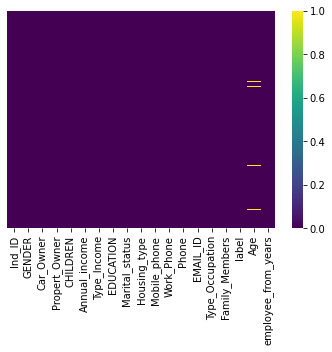

In [249]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

In [250]:
data['Age'].mean()

43.43971166448231

In [251]:
data['Age'].median()

42.0

In [252]:
data['Age'].mode()

0    37.0
Name: Age, dtype: float64

In [253]:
# so replacing null values with median in age column
data['Age'].fillna(42,inplace = True)

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ind_ID               1548 non-null   int64  
 1   GENDER               1548 non-null   int64  
 2   Car_Owner            1548 non-null   int64  
 3   Propert_Owner        1548 non-null   int64  
 4   CHILDREN             1548 non-null   int64  
 5   Annual_income        1548 non-null   float64
 6   Type_Income          1548 non-null   object 
 7   EDUCATION            1548 non-null   object 
 8   Marital_status       1548 non-null   object 
 9   Housing_type         1548 non-null   object 
 10  Mobile_phone         1548 non-null   int64  
 11  Work_Phone           1548 non-null   int64  
 12  Phone                1548 non-null   int64  
 13  EMAIL_ID             1548 non-null   int64  
 14  Type_Occupation      1548 non-null   object 
 15  Family_Members       1548 non-null   i

In [255]:
# FEATURE SELECTION
data.drop(columns=['Ind_ID','Mobile_phone','Work_Phone','EMAIL_ID'], inplace=True)
data.sample(2)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Phone,Type_Occupation,Family_Members,label,Age,employee_from_years
602,0,1,1,0,121500.0,State servant,Incomplete higher,Single / not married,House / apartment,0,Laborers,1,0,24.0,4
256,1,0,0,0,225000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0,other,2,0,59.0,-1001


DATA VISUALIZATION

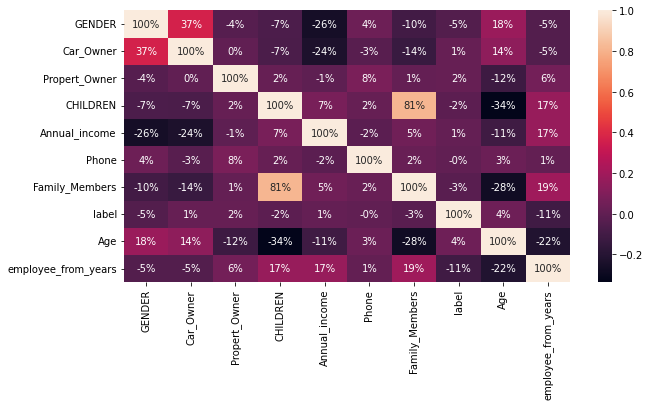

In [256]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(method='spearman'), annot=True, fmt='.0%')
plt.show()   # family members and children column are highly correlated so we can remove any one of them

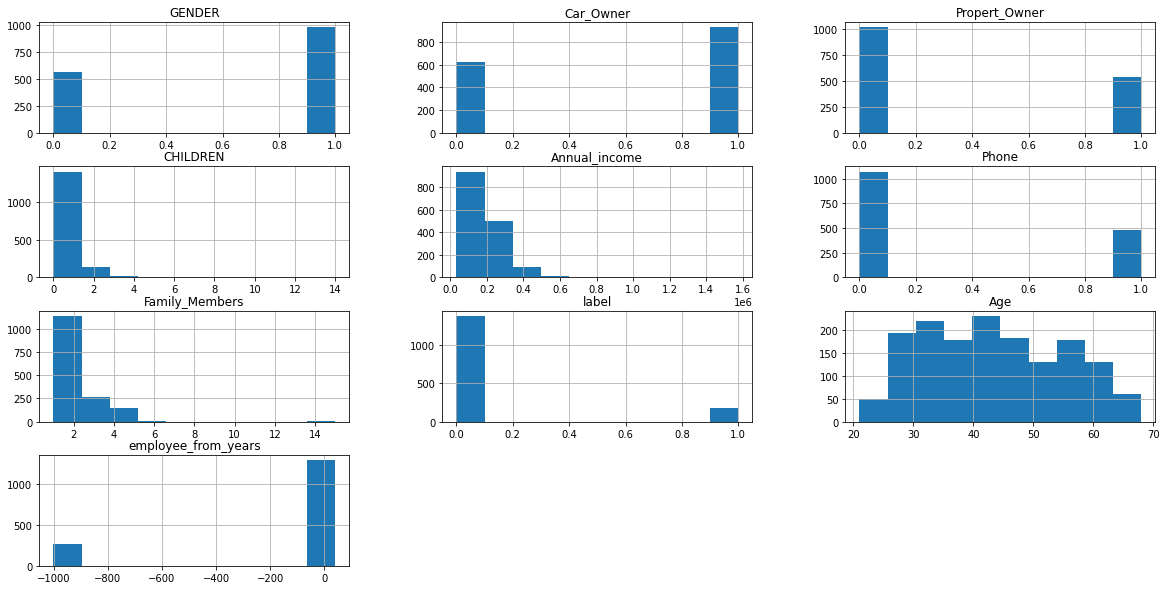

In [257]:
data.hist(figsize=(20, 10))
plt.show()

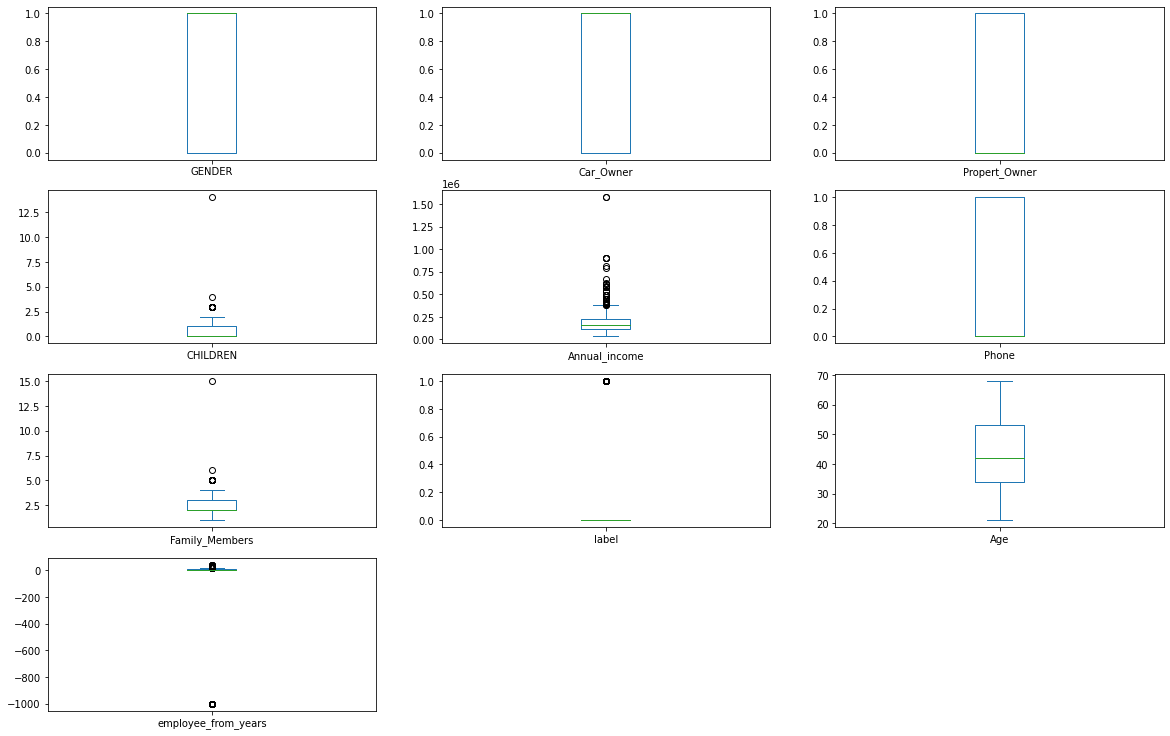

In [258]:
# Show horizontal box plots of each column in the dataframe
data.plot(kind='box', subplots=True, layout=(12,3), sharex=False, sharey=False, figsize=(20, 40))
plt.show()

<Axes: >

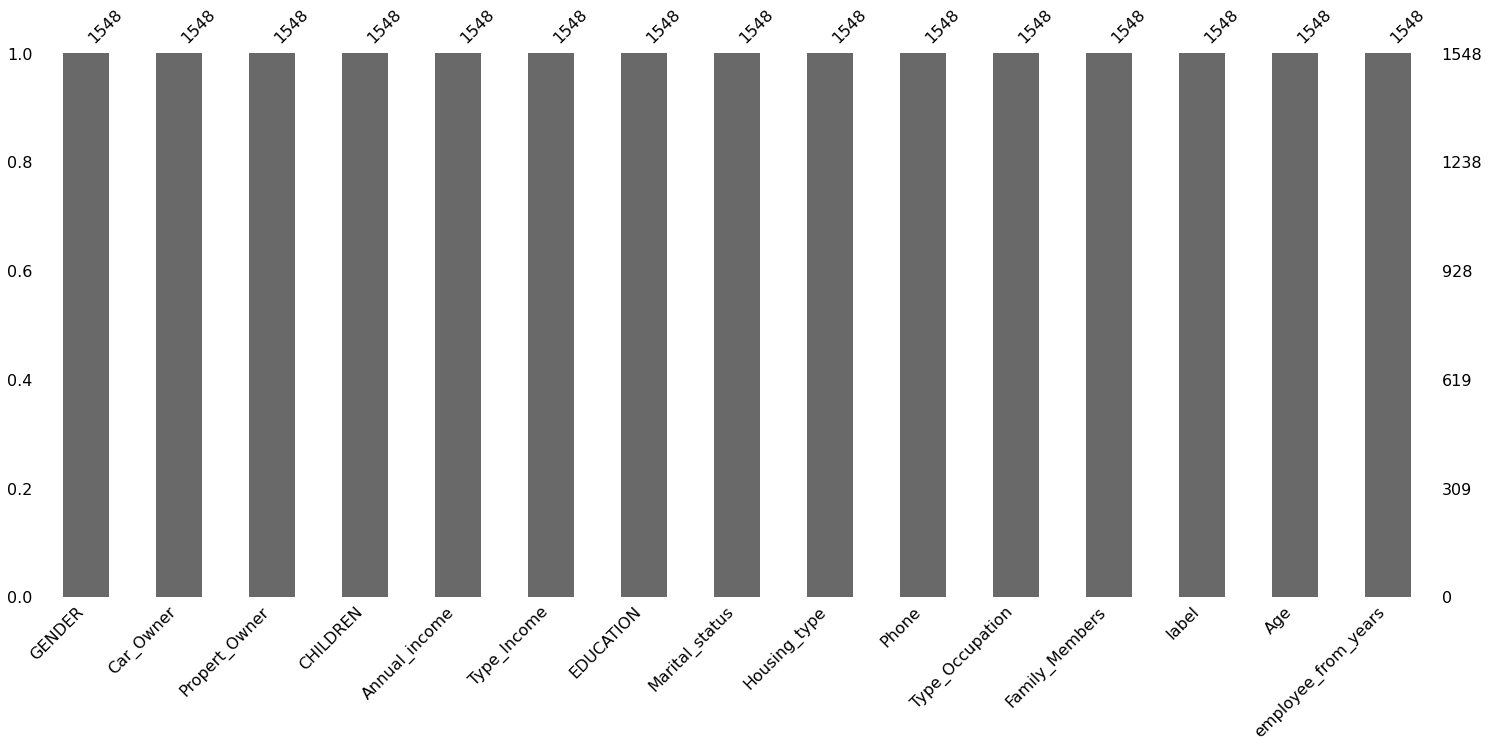

In [269]:
msno.bar(data)

In [259]:
data['CHILDREN'].replace(to_replace=14,value=0,inplace = True)

In [260]:
data['CHILDREN'].value_counts()

0    1092
1     305
2     134
3      16
4       1
Name: CHILDREN, dtype: int64

In [261]:
# one hot encoding
def one_hot_encode(data, columns):
    for col in columns:
        one_hot = pd.get_dummies(data[col], drop_first=True)
        data = pd.concat([data, one_hot], axis=1)
        data = data.drop([col], axis=1)
    return data

categories=['Type_Income','EDUCATION','Marital_status','Housing_type','Type_Occupation']
final_data = one_hot_encode(data,categories)
final_data.head(5)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Phone,Family_Members,label,Age,employee_from_years,...,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,other
0,0,0,0,0,180000.0,0,2,1,51.0,-1001,...,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,315000.0,1,2,1,37.0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,315000.0,1,2,1,42.0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,1,0,315000.0,1,2,1,37.0,1,...,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,315000.0,1,2,1,37.0,1,...,0,0,0,0,0,0,0,0,0,1


In [262]:
# train test_split

X = final_data.drop(columns=('label'),axis=1)
y = final_data.label
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

X_train : (1238, 43)
X_test : (310, 43)
y_train : (1238,)
y_test : (310,)


In [263]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [268]:
# LOGISTIC REGRESSION

LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print('Accuracy is : ',accuracy_score(y_test, y_pred))

Accuracy is :  0.9129032258064517


In [270]:
# DECISION TREE
DTC = DecisionTreeClassifier(max_depth=42,
                                min_samples_split=8,
                                random_state=1024)
DTC.fit(X_train, y_train)
y_predict = DTC.predict(X_test)

print('Accuracy is : ',accuracy_score(y_test, y_pred))

Accuracy is :  0.9129032258064517


In [271]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )
RFC.fit(X_train, y_train)
y_predict = RFC.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
confusion_matrix(y_test,y_predict)

Accuracy Score is 0.9129


array([[283,   0],
       [ 27,   0]])

In [272]:
from xgboost import XGBClassifier
XG = XGBClassifier(max_depth=12,
                      n_estimators=250,
                      min_child_weight=8, 
                      subsample=0.8, 
                      learning_rate =0.02,    
                      seed=42)

XG.fit(X_train, y_train)
y_predict = XG.predict(X_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
confusion_matrix(y_test,y_predict)

Accuracy Score is 0.9129


array([[283,   0],
       [ 27,   0]])

[3.14438785e-02 4.18473571e-02 4.05415729e-02 4.06262303e-02
 1.61047561e-01 3.99344615e-02 5.05346162e-02 1.58693644e-01
 9.79225123e-02 1.29328758e-02 7.42600885e-03 2.56952323e-02
 1.87149200e-02 6.01869281e-03 6.83601930e-03 2.08300655e-02
 1.98579480e-02 1.33179378e-02 1.46434478e-02 9.09184202e-03
 1.36194625e-02 1.34250220e-02 2.45500144e-03 4.18951256e-03
 6.32399642e-03 3.18558445e-03 5.20975968e-03 1.69208014e-02
 8.63819197e-03 1.05745663e-04 8.73818010e-03 1.06647826e-02
 1.94910298e-02 4.50901706e-03 1.35446379e-02 5.46330619e-03
 9.17993659e-04 1.17585585e-04 9.02477395e-03 2.71635381e-04
 1.15414011e-02 2.86045216e-03 2.08253024e-02]


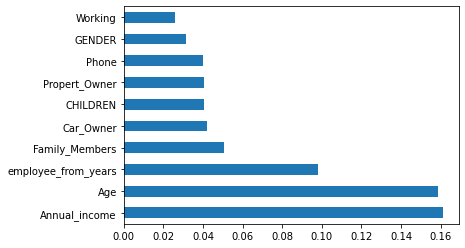

In [273]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

WE CAN CLEARLY SAY THAT EMPLOYEES EXPERIENCE ,AGE AND ANNUAL INCOME ARE THE MOST IMPORTANT FEATURES IN OUR DATA AND WE CAN CONCLUDE THAT THESE ARE THE TOP 3 IMPORTANT FEATURES IN OUR FEATURE SELECTION TECHNIQUE

CONCLUSION :

I BUILT A MACHINE LEARNING BASED CLASSIFIER THAT PREDICTS IF A CREDIT CARD WILL GET APPROVED OR NOT,BASED ON THE INFORMATION PROVIDED IN THE APPLICATION

WHILE BUILDING THIS CREDITCARD APPROVAL PREDICTOR I USED VARIOUS PRE PROCESSING STEPS LIKE FEATURE (ENGINEERING,SELECTION),HANDLING MISSING VALUES AND OUTLIERS,DEALING WITH CATEGORICAL FEATURES ETC.

I USED VARIOUS PYTHON LIBRARIES WHICH ARE VERY HELPFULL WHEN DEALING WITH DATA 
AND BY BEST I GOT AN ACCURACY OF 91 PERCENT.

In [275]:
final_data.to_csv("credit_card_data.csv",index=False)